# KNN SCI Kit Learn  Tutorial 

## Soumil Nitin Shah 
Bachelor in Electronic Engineering |
Masters in Electrical Engineering | 
Master in Computer Engineering |

* Website : https://soumilshah.herokuapp.com
* Github: https://github.com/soumilshah1995
* Linkedin: https://www.linkedin.com/in/shah-soumil/
* Blog: https://soumilshah1995.blogspot.com/
* Youtube : https://www.youtube.com/channel/UC_eOodxvwS_H7x2uLQa-svw?view_as=subscriber
* Facebook Page : https://www.facebook.com/soumilshah1995/
* Email : shahsoumil519@gmail.com
* projects : https://soumilshah.herokuapp.com/project


Hello! I’m Soumil Nitin Shah, a Software and Hardware Developer based in New York City. I have completed by Bachelor in Electronic Engineering and my Double master’s in Computer and Electrical Engineering. I Develop Python Based Cross Platform Desktop Application , Webpages , Software, REST API, Database and much more I have more than 2 Years of Experience in Python


In [21]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import scikitplot as skplt

In [77]:
df = pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

class NN():
    
    def __init__(self, max_iter=150,  knn_value=1):
        self.max_iter=max_iter
        self. knn_value = knn_value
        self.X_Train, self.X_Test, self.Y_Train, self.Y_Test = self.preprocess
        self.model = self.create_model
        self.errorrate = []
    
    @property
    def preprocess(self):
        df = pd.read_csv('KNN_Project_Data')
        X_Data = df[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM','JHZC']]
        Y_Data = df ['TARGET CLASS']
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.4, random_state=101)
        return X_Train, X_Test, Y_Train, Y_Test 
    
    @property
    def create_model(self):
        """
        return : Model Object 
        """
        model = KNeighborsClassifier(n_neighbors=self. knn_value)
        return model
        
    
    @property
    def train(self):
        """
        return None Train the Model
        """
        self.model.fit(self.X_Train, self.Y_Train)
        
    @property   
    def test(self):
        """
        return pred [Array ]
        return coef_ [array]
        return intercept_ [array]
        """
        pred = self.model.predict(self.X_Test)
        return pred
    
    @property
    def download_report(self):
        """
        return confusion matrix 
        return classification report
        return plots the confusion matrix 
        """
        pred = self.test
        report = classification_report(self.Y_Test, pred)
        matrix = confusion_matrix(self.Y_Test, pred)
        skplt.metrics.plot_confusion_matrix(self.Y_Test, 
                                            pred,
                                           figsize=(6,6),
                                           title="Confusion Matrix")
        return report, matrix
    
    def choose_kvalue(self, value=40):
        
        for i in range(1,value):
            newmodel = KNeighborsClassifier(n_neighbors = i)
            newmodel.fit(self.X_Train, self.Y_Train)
            pred = newmodel.predict(self.X_Test)
            self.errorrate.append(np.mean(pred != self.Y_Test))
            
        plt.figure(figsize=(10,6))
        plt.plot(range(1, value), self.errorrate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
        plt.title('Error Rate vs. K Value')
        plt.xlabel('K')
        plt.ylabel('Error Rate')
            
    
    @property
    def plot(self):
        pass

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       199
           1       0.80      0.81      0.80       201

   micro avg       0.80      0.80      0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



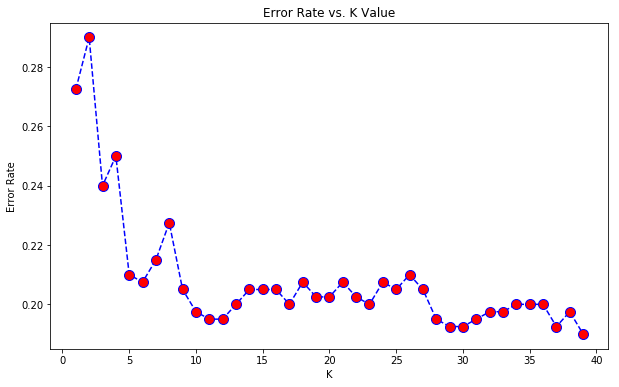

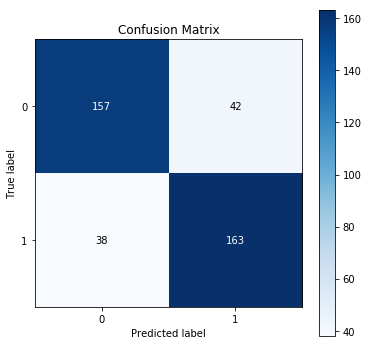

In [76]:
neural = NN(knn_value=36)
neural.choose_kvalue()
neural.train
pred = neural.test
report, matrix = neural.download_report
print(report)
